In [16]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('/Users/avi/Desktop/Projects/insurance.csv')

print("Dataset shape:", df.shape)
print(df.head())
print("\nInfo:")
print(df.info())

Dataset shape: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [17]:
# Check missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])        # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])  # yes=1, no=0
df['region'] = le.fit_transform(df['region'])  # 4 regions → 0-3


In [19]:
# Independent variables
X = df.drop('charges', axis=1)

# Dependent variable
y = df['charges']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4186.5088983664355
RMSE: 5799.587091438359
R² Score: 0.7833463107364537


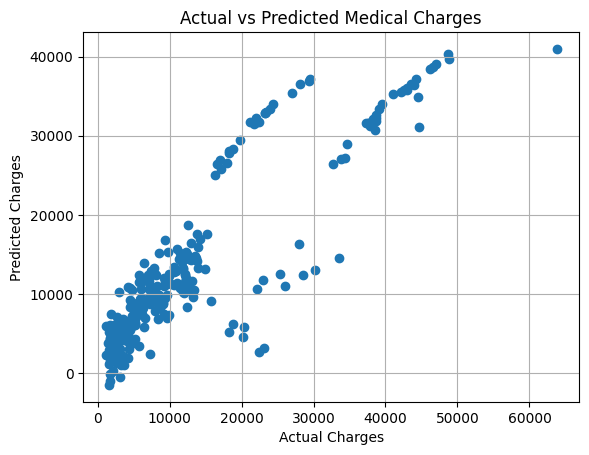

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.grid(True)
plt.show()


In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Generate interaction-only polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)

# Get feature names and wrap it in a DataFrame for readability
feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Preview the new feature matrix
print("🔍 New Feature Matrix Shape:", X_poly_df.shape)
print("\n🆕 Feature Names:")
print(feature_names)

print("\n📊 Sample Data (First 5 Rows):")
print(X_poly_df.head())


🔍 New Feature Matrix Shape: (1338, 21)

🆕 Feature Names:
['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'age sex' 'age bmi'
 'age children' 'age smoker' 'age region' 'sex bmi' 'sex children'
 'sex smoker' 'sex region' 'bmi children' 'bmi smoker' 'bmi region'
 'children smoker' 'children region' 'smoker region']

📊 Sample Data (First 5 Rows):
    age  sex     bmi  children  smoker  region  age sex  age bmi  \
0  19.0  0.0  27.900       0.0     1.0     3.0      0.0  530.100   
1  18.0  1.0  33.770       1.0     0.0     2.0     18.0  607.860   
2  28.0  1.0  33.000       3.0     0.0     2.0     28.0  924.000   
3  33.0  1.0  22.705       0.0     0.0     1.0     33.0  749.265   
4  32.0  1.0  28.880       0.0     0.0     1.0     32.0  924.160   

   age children  age smoker  ...  sex bmi  sex children  sex smoker  \
0           0.0        19.0  ...    0.000           0.0         0.0   
1          18.0         0.0  ...   33.770           1.0         0.0   
2          84.0         0.0  ... 

In [27]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit models
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# Predict
ridge_preds = ridge.predict(X_test_scaled)
lasso_preds = lasso.predict(X_test_scaled)

def eval_model(name, y_true, y_pred):
    print(f"\n📈 {name} Performance:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))


# Evaluate both models
eval_model("Ridge Regression", y_test, ridge_preds)
eval_model("Lasso Regression", y_test, lasso_preds)



📈 Ridge Regression Performance:
MAE : 2803.4684394900883
RMSE: 4615.726417495011
R²  : 0.862769053528207

📈 Lasso Regression Performance:
MAE : 2787.799502186014
RMSE: 4617.967624430793
R²  : 0.8626357537651056


In [28]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit models
rf_model.fit(X_train_poly, y_train)
xgb_model.fit(X_train_poly, y_train)

# Predict
rf_preds = rf_model.predict(X_test_poly)
xgb_preds = xgb_model.predict(X_test_poly)

# Evaluate
eval_model("Random Forest", y_test, rf_preds)
eval_model("XGBoost", y_test, xgb_preds)



📈 Random Forest Performance:
MAE : 2428.109480462474
RMSE: 4533.843904161937
R²  : 0.8675947922421795

📈 XGBoost Performance:
MAE : 2453.5928748993415
RMSE: 4556.357524175134
R²  : 0.8662765634950941


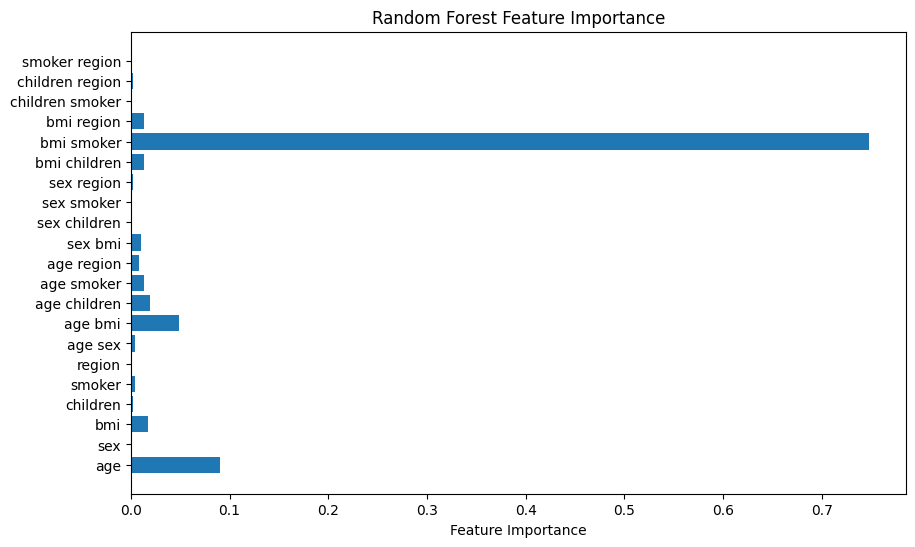

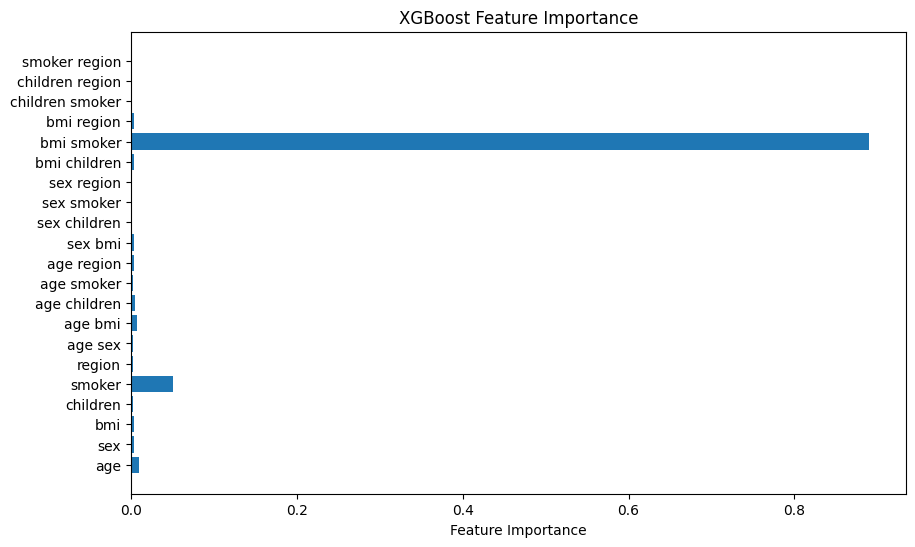

In [31]:
# Use the column names from the original feature matrix
feature_names = X_poly_df.columns

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(rf_importances)), rf_importances, align='center')
plt.yticks(range(len(rf_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Plot Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(range(len(xgb_importances)), xgb_importances, align='center')
plt.yticks(range(len(xgb_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()


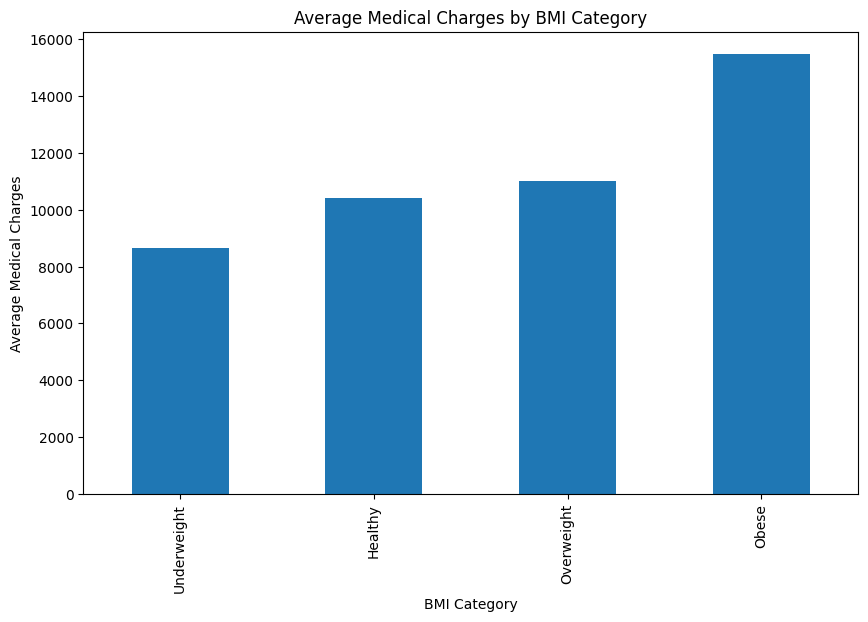

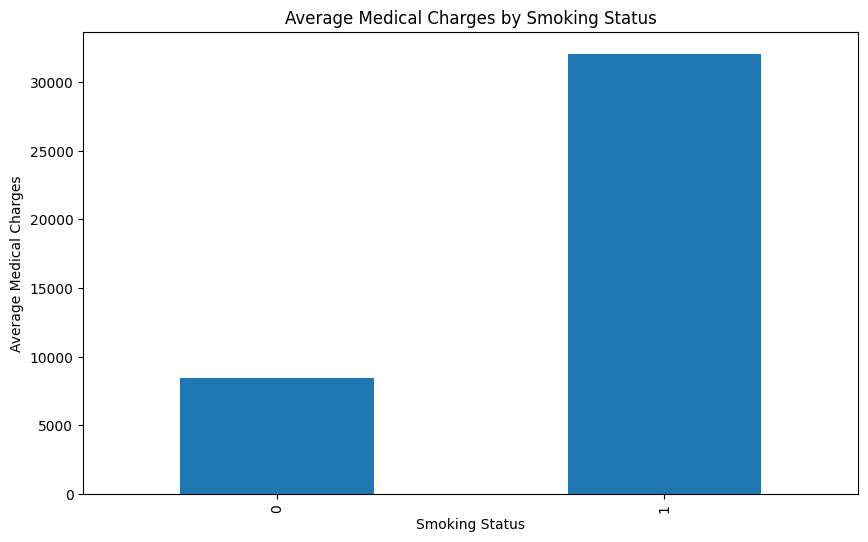

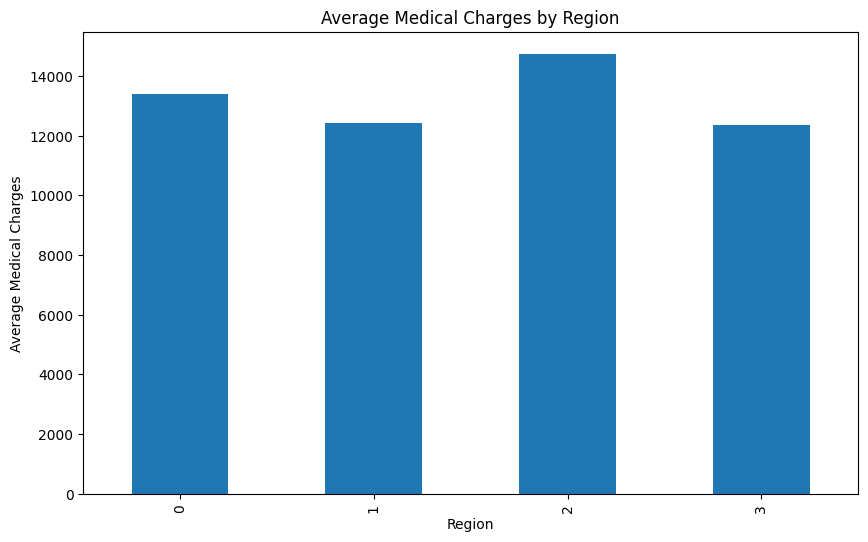

In [32]:
# Create BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], 
                             labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])

# Group by bmi category and plot average charges
plt.figure(figsize=(10, 6))
df.groupby('bmi_category')['charges'].mean().plot(kind='bar')
plt.title('Average Medical Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Medical Charges')
plt.show()

# Group by smoker status and plot average charges
plt.figure(figsize=(10, 6))
df.groupby('smoker')['charges'].mean().plot(kind='bar')
plt.title('Average Medical Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Medical Charges')
plt.show()

# Group by region and plot average charges
plt.figure(figsize=(10, 6))
df.groupby('region')['charges'].mean().plot(kind='bar')
plt.title('Average Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Medical Charges')
plt.show()


# Test

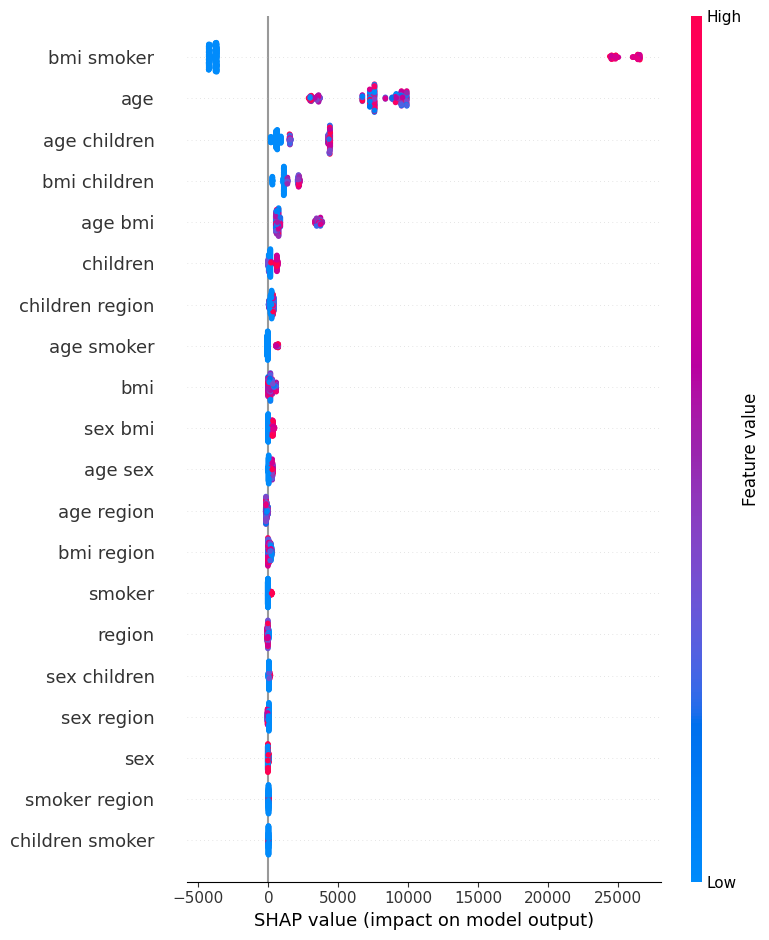

In [34]:
import shap

# Initialize SHAP explainer for Random Forest model
explainer = shap.TreeExplainer(rf_model)  # Change to xgb_model if using XGBoost
shap_values = explainer.shap_values(X_test_poly)

# Create a DataFrame with column names (from the original DataFrame before scaling)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=X_poly_df.columns)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_poly_df, feature_names=X_test_poly_df.columns)



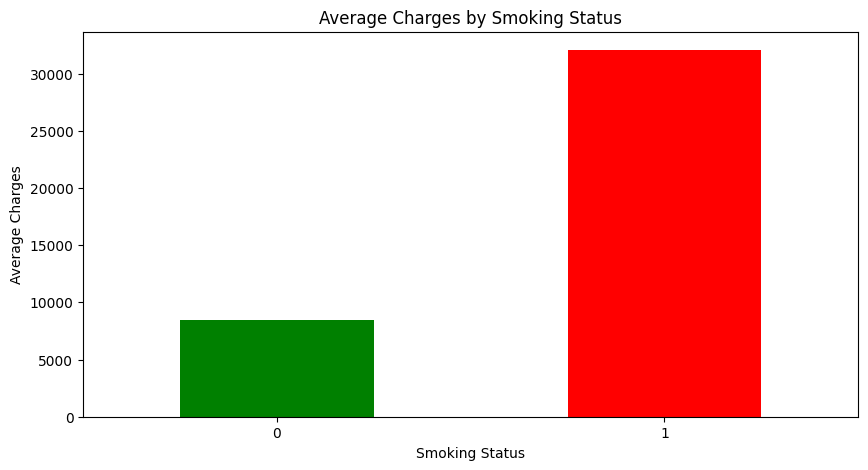

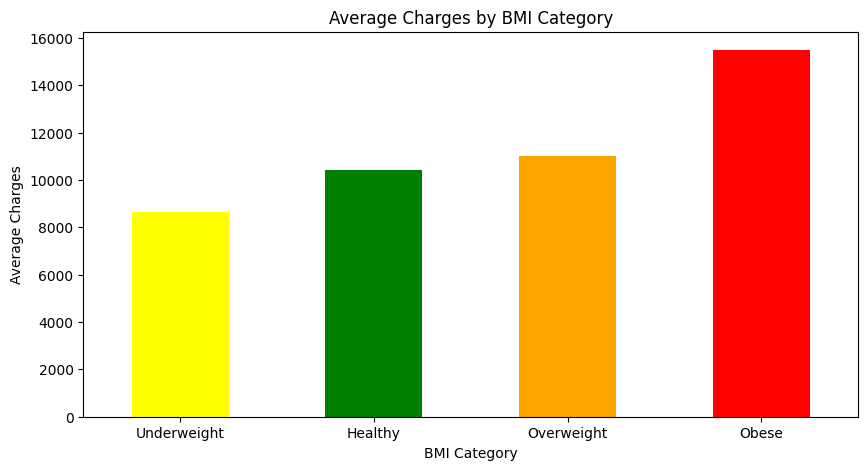

In [36]:
# Create BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], 
                            labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])

# Group by smoker and calculate mean charges
grouped_smoker = df.groupby('smoker')['charges'].mean()

# Group by BMI category and calculate mean charges
grouped_bmi = df.groupby('bmi_category')['charges'].mean()

# Plot the results
import matplotlib.pyplot as plt

# Plot charges by smoker status
plt.figure(figsize=(10, 5))
grouped_smoker.plot(kind='bar', color=['green', 'red'])
plt.title('Average Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Charges')
plt.xticks(rotation=0)
plt.show()

# Plot charges by BMI category
plt.figure(figsize=(10, 5))
grouped_bmi.plot(kind='bar', color=['yellow', 'green', 'orange', 'red'])
plt.title('Average Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.xticks(rotation=0)
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Create a function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[model_name] = {'MSE': mse, 'R2': r2}
    
    return results

# Evaluate models
model_results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
for model_name, metrics in model_results.items():
    print(f"{model_name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")


Linear Regression: MSE = 21327549.910246175, R2 = 0.8626233547590931
Random Forest: MSE = 20528644.99584972, R2 = 0.8677693221800171
Gradient Boosting: MSE = 18277539.15217199, R2 = 0.8822693172656261


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Hyperparameter grid for Random Forest Regressor
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train_scaled, y_train)

# Best parameters found
best_params = rf_random_search.best_params_
print("Best hyperparameters found: ", best_params)

# Evaluate the best model
best_rf_model = rf_random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_scaled)

# Performance metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Optimized Random Forest: MSE = {mse_best}, R2 = {r2_best}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/U

Best hyperparameters found:  {'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 178}
Optimized Random Forest: MSE = 18895676.889845517, R2 = 0.8782877212053305


In [48]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'optimized_random_forest_model.pkl')


['optimized_random_forest_model.pkl']